# CLUSTERING

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# beer dataset
beer = pd.read_csv('./data/beer.txt', sep=' ')

In [3]:
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [5]:
# define X
X = beer.drop('name', axis=1)

In [6]:
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


## K-means CLUSTERING

Having pre-processed the data we can now perform clustering on the dataset. In this section, we will be using the python library [scikit-learn](http://scikit-learn.org/stable/index.html) for our machine learning algorithms. scikit-learn provides an extensive library of machine learning algorithms that can be used for analysis. Here is a [nice flow chart](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) that shows various algorithms implemented
and when to use any of them. In this part we will look at K-Means clustering

> **Note on terminology**: "samples" and "features" are two words you will come across frequently when you look at machine learning papers or documentation. "samples" refer to data points that are used as inputs to the machine learning algorithm. For example in our dataset each row of beer is a "sample". "features" refers to some representation we have for every sample. For example the sodium, alochol, cost and calories are "features". 

#### K-Means algorithm

Clustering is the process of automatically grouping data points that are similar to each other. In the [K-Means algorithm](http://en.wikipedia.org/wiki/K-means_clustering) we start with `K` initially chosen cluster centers (or centroids). We then compute the distance of every point from the centroids and assign each point to the centroid. Next we update the centroids by averaging all the points in the cluster. Finally, we repeat the algorithm until the cluster centers are stable.

### RUNNING K-Means

#### K-Means interface
Take a minute to look at the scikit-learn interface for calling [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). The constructor of the KMeans class returns a `estimator` on which you can call [fit](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit) to perform clustering.

#### K-Means parameters
From the above description we can see that there are a few parameters which control the K-Means algorithm. We will look at one parameter specifically, the number of clusters used in the algorithm. The number of clusters needs to be chosen based on domain knowledge of the data. As we do not know how many clusters exist we will try different values and compare the results.

#### Timing your code
We will also measure the performance of clustering algorithms in this section. You can time the code in a cell using the **%%time** [IPython magic](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb) as the first line in the cell. 

>**Note**: By default, the scikit-learn KMeans implementation runs the algorithm 10 times with different center initializations. You can run it just once by passing the `n_init` argument as 1.

In [7]:
%%time

# K-means with 2 clusters
from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=2, n_init=1, random_state=1)
kmeans_2.fit(X)

Wall time: 389 ms


In [8]:
%%time

# K-means with 3 clusters
kmeans_3 = KMeans(n_clusters=3, n_init=1, random_state=1)
kmeans_3.fit(X)

Wall time: 2 ms


In [9]:
%%time

# K-means with 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=1, random_state=1)
kmeans_4.fit(X)

Wall time: 2 ms


In [10]:
# review the cluster labels (based on calories only, due to scale)
kmeans_3.labels_

array([0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [11]:
beer['cluster'] = kmeans_3.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
16,Hamms,139,19,4.4,0.43,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
14,Kirin,149,6,5.0,0.79,0
10,Coors,140,18,4.6,0.44,0


In [12]:
# review the cluster centers
kmeans_3.cluster_centers_

array([[ 146.25      ,   17.25      ,    4.38333333,    0.51333333],
       [  91.83333333,   10.16666667,    3.58333333,    0.43333333],
       [ 172.5       ,   15.5       ,    5.35      ,    0.565     ]])

In [13]:
centers = beer.groupby('cluster').mean()

In [14]:
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,146.250000,17.250000,4.383333,0.513333
1,91.833333,10.166667,3.583333,0.433333
2,172.500000,15.500000,5.350000,0.565000


In [15]:
# create colors array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue'])

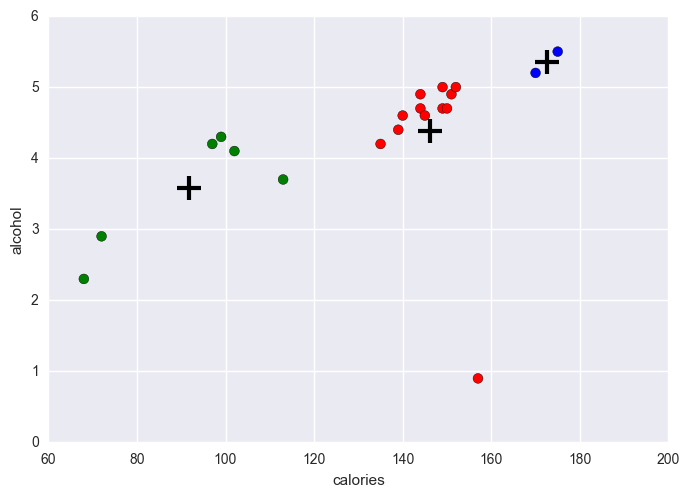

In [16]:
# plot clusters with their centers
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50)
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('calories')
plt.ylabel('alcohol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C081518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E0270B8>]], dtype=object)

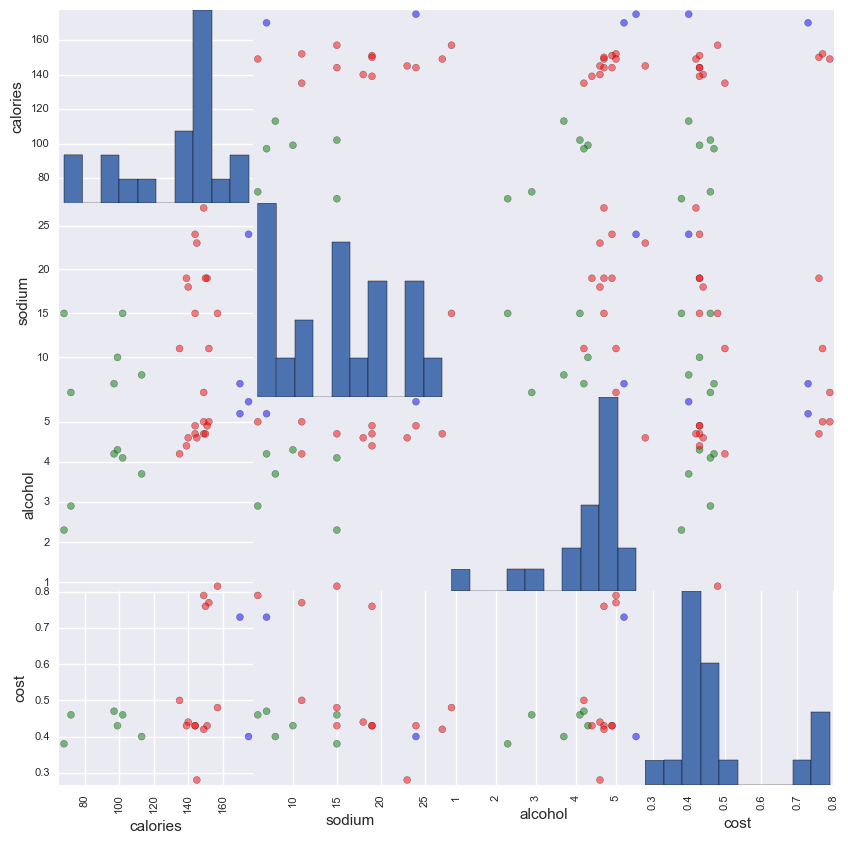

In [17]:
# scatter plot matrix
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

In [18]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [20]:
# K-means with 3 clusters on scaled data
kmeans_3.fit(X_scaled)
beer['cluster'] = kmeans_3.labels_
beer.sort_values('cluster')
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E863048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F9B0A90>]], dtype=object)

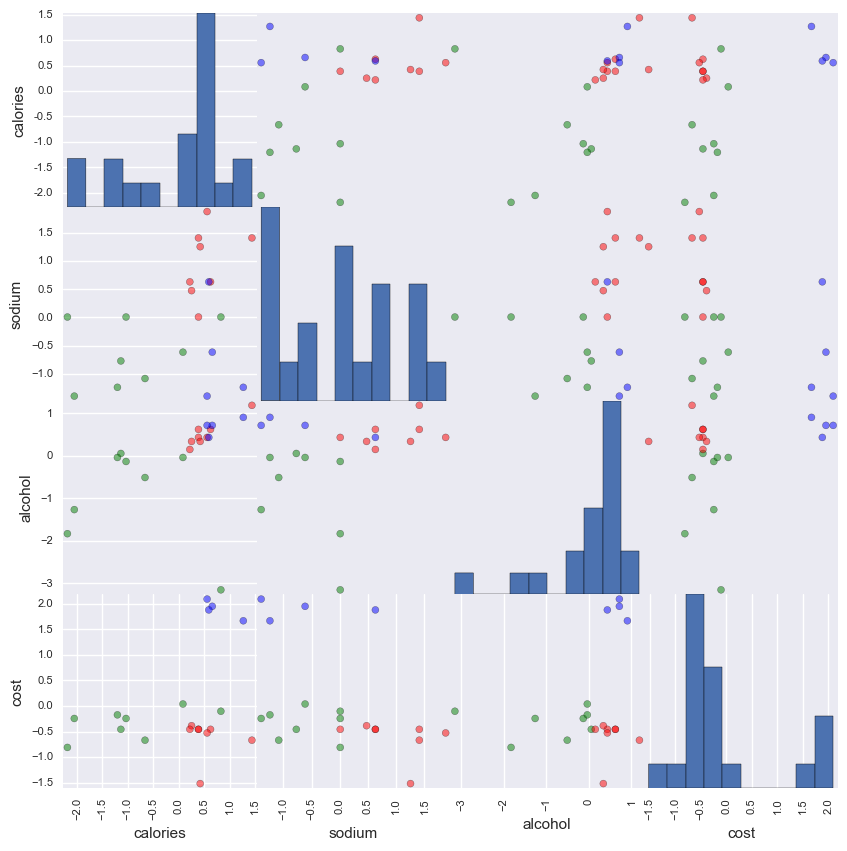

In [21]:
# scatter plot matrix with scaled data
beer_scaled = pd.DataFrame(X_scaled, columns=beer.columns[1:-1])
pd.scatter_matrix(beer_scaled, c=colors[beer.cluster], figsize=(10,10), s=100)

In [22]:
beer_scaled

,calories,sodium,alcohol,cost
0,0.387913,0.007795,0.433808,-0.456830
1,0.625066,0.631369,0.622420,-0.456830
2,0.828339,0.007795,-3.149822,-0.102698
3,1.268765,-1.239354,0.905338,1.667960
4,0.658944,-0.615780,0.716726,1.951265
5,0.421792,1.254943,0.339502,-1.519224
6,1.438159,1.410837,1.188256,-0.669309
7,0.557308,1.878518,0.433808,-0.527656
8,-1.136637,-0.771673,0.056584,-0.456830
9,-0.662332,-1.083460,-0.509253,-0.669309


## EVALUATING K-means

In addition to the performance comparisons we also wish to compare how good our clusters are. To do this we are first going to look at internal evaluation metrics. For internal evaluation we only use the input data and the clusters created and try to measure the quality of clusters created. We are going to use two metrics for this:

### INERTIA

Inertia is a metric that is used to estimate how close the data points in a cluster are. This is calculated as the sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster center. The intution behind inertia is that clusters with lower inertia are better as it means closely related points form a cluster. Inertia is calculated by scikit-learn by default.

In [23]:
print "Inertia for KMeans with 2 clusters = %lf " % kmeans_2.inertia_
print "Inertia for KMeans with 3 clusters =  %lf " % kmeans_3.inertia_
print "Inertia for KMeans with 4 clusters = %lf " % kmeans_4.inertia_

Inertia for KMeans with 2 clusters = 3860.825198 
Inertia for KMeans with 3 clusters =  27.849901 
Inertia for KMeans with 4 clusters = 1239.400683 


**Q**. Does KMeans run with 4 clusters have lower or greater inertia than the ones with 3 clusters ? Which algorithm is better and why ?

>Lower inertia. It is better since more closely related points are forming a cluster

### SILHOUETTE SCORE

The silhouette score measures how close various clusters created are. A higher silhouette score is better as it means that we dont have too many overlapping clusters. The silhouette score can be computed using [sklearn.metrics.silhouette_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) from scikit learn.

This measure has a range of [-1, 1].

Silhoette Score (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

The silhouette analysis is used to choose an optimal value for n_clusters. 


** Silhouette Score (SC) is calculated for each observation as follows:

- a = mean distance to all other points in its cluster
- b = mean distance to all other points in the next nearest cluster
- SC = (b-a)/max(a, b)

- SC ranges from -1 (worst) to 1 (best).

- A global SC is calculated by taking the mean of the SC for all observations.

In [24]:
beer.shape

(20, 6)

In [25]:
from sklearn import metrics

# NOTE: Use all 20 points to calculate the silhouette score. On a big dataset, you can adjust the sample_size
print "Silhouette Score for KMeans with 2 clusters = %lf" % metrics.silhouette_score(X_scaled, kmeans_2.labels_, sample_size=20)
print "Silhouette Score for KMeans with 3 clusters = %lf " % metrics.silhouette_score(X_scaled, kmeans_3.labels_, sample_size=20)
print "Silhouette Score for KMeans with 4 clusters = %lf " % metrics.silhouette_score(X_scaled, kmeans_4.labels_, sample_size=20)

Silhouette Score for KMeans with 2 clusters = 0.305725
Silhouette Score for KMeans with 3 clusters = 0.457774 
Silhouette Score for KMeans with 4 clusters = 0.101166 


**Q**. How does increasing the number of clusters affect the silhouette score ?
>Increasing the number of clusters decreases the silhouette score since it is more likely that there are too many clusters, which are all similar

In [26]:
# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

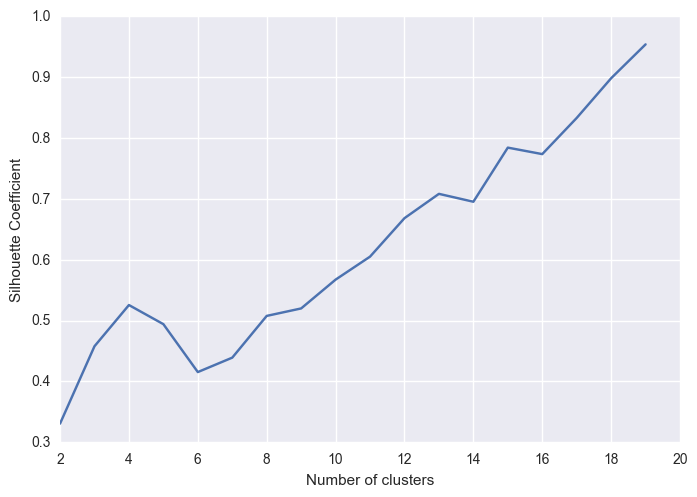

In [27]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [28]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1
